___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Multivariate Time Series Forecasting with RNN<br><br>Demand Prediction Project (Bike Sharing)<br><h1>

# WELCOME!

Welcome to ***"Demand Prediction Project"***. This is the third capstone project.
As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

In this project, the goal is to predict the number of future bike shares given the historical data of London bike shares. So this case should be handled as a time series problem with ***Bidirectional LSTM***. 

In order to achieve this goal, you will make predictions with LSTM, unlike the machine learning algorithms you have applied before. Long short term memory (LSTM) is an artificial repetitive neural network architecture used in the field of deep learning. Unlike standard feed forward neural networks, LSTM has feedback links. It can process not only single data points but also entire data series. 

Before diving into the project, please take a look at the Determines and Tasks.

- **NOTE:** This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind LSTM.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.


---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.

Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.

In the Pre-Processing task after train test split and robust scaling, the challenge for you will be to divide the data into time steps and transform it into a three dimentional numpy array.

Then in the model building task, build your model appropriate and compare the train and validation losses using a graph. 

When making prediction, you will need to do the inverse transform process to get a true error score. Otherwise, the results you get with scaled target variables may mislead you.

Finally, Visualize how well your model's predictions match the actual values of the test data and also calculate error scores.


- ***Note:*** *What you can do in this project is more than what is asked of you.*


# #Tasks

#### 1. Exploratory Data Analysis

- Check Missing Values and Outliers
- Plot Breakdowns of Data

    *i.  Plot bike shares over time*
    
    *ii.  Plot bike shares by months*
    
    *iii. Plot bike shares by hours*
    
    *iv. Plot bike shares by day of week*
    
    *v. Plot the distribution of bike shares on holidays by seasons*
    
- Drop unnecessary columns
    
#### 2. Data Pre-Processing

- Train - Test Split
- Scaling
- Define a Function for Creating Time Steps

#### 3. Model Building with LSTM

- Create, Compile and Fit Bidirectional LSTM Model
- Plot Train and Validation Losses

#### 4. Evaluate on Test Data

- Inverse Transform
- Plot Prediction

#### 5. Retrain and Forecasting

## Improt Libraries and Indest Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('../content/store_sharing.csv',index_col=0, parse_dates = True) 

In [ ]:
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.000,2.000,93.000,6.000,3.000,0.000,1.000,3.000
2015-01-04 01:00:00,138,3.000,2.500,93.000,5.000,1.000,0.000,1.000,3.000
2015-01-04 02:00:00,134,2.500,2.500,96.500,0.000,1.000,0.000,1.000,3.000
2015-01-04 03:00:00,72,2.000,2.000,100.000,0.000,1.000,0.000,1.000,3.000
2015-01-04 04:00:00,47,2.000,0.000,93.000,6.500,1.000,0.000,1.000,3.000
...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.000,1.000,81.000,19.000,3.000,0.000,0.000,3.000
2017-01-03 20:00:00,541,5.000,1.000,81.000,21.000,4.000,0.000,0.000,3.000
2017-01-03 21:00:00,337,5.500,1.500,78.500,24.000,4.000,0.000,0.000,3.000


---
---

## 1. Exploratory Data Analysis

- Firstly, focus data based on the timestamp. You can create various variables such as, hour, day of week, day of month etc.
- You can check missing values and outliers.
- Also you can plot breakdowns of data.

### Check Missing Values and Outliers

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.3 MB


In [ ]:
df.nunique()

cnt             3781
t1                73
t2                82
hum              143
wind_speed       103
weather_code       7
is_holiday         2
is_weekend         2
season             4
dtype: int64

In [ ]:
#df["cnt"].sort_values().unique()
df.cnt.value_counts(dropna=False)

46      46
53      39
33      36
70      36
120     36
        ..
3022     1
3112     1
1338     1
3270     1
2220     1
Name: cnt, Length: 3781, dtype: int64

In [ ]:
df["t2"].sort_values().unique()
#df.t2.value_counts(dropna=False)

array([-6.        , -5.5       , -5.        , -4.5       , -4.        ,
       -3.5       , -3.        , -2.5       , -2.        , -1.5       ,
       -1.        , -0.5       ,  0.        ,  0.5       ,  1.        ,
        1.5       ,  2.        ,  2.5       ,  3.        ,  3.5       ,
        4.        ,  4.5       ,  5.        ,  5.5       ,  6.        ,
        6.5       ,  7.        ,  7.5       ,  8.        ,  8.5       ,
        9.        ,  9.5       , 10.        , 10.33333333, 10.5       ,
       11.        , 11.5       , 12.        , 12.5       , 13.        ,
       13.5       , 14.        , 14.5       , 15.        , 15.5       ,
       16.        , 16.5       , 17.        , 17.5       , 18.        ,
       18.5       , 19.        , 19.5       , 20.        , 20.5       ,
       21.        , 21.5       , 22.        , 22.5       , 23.        ,
       23.5       , 24.        , 24.5       , 25.        , 25.5       ,
       26.        , 26.5       , 27.        , 27.5       , 28.  

In [ ]:
df["hum"].sort_values().unique()
#df.hum.value_counts(dropna=False)

array([ 20.5 ,  23.  ,  23.5 ,  24.  ,  25.  ,  25.5 ,  26.  ,  26.5 ,
        27.  ,  28.  ,  28.5 ,  29.  ,  29.5 ,  30.  ,  30.5 ,  31.  ,
        31.5 ,  32.  ,  32.5 ,  33.  ,  33.5 ,  34.  ,  34.5 ,  35.  ,
        35.5 ,  36.  ,  36.5 ,  37.  ,  37.5 ,  38.  ,  38.5 ,  39.  ,
        39.5 ,  40.  ,  40.5 ,  41.  ,  41.5 ,  42.  ,  42.5 ,  43.  ,
        43.5 ,  44.  ,  44.5 ,  45.  ,  45.5 ,  46.  ,  46.5 ,  47.  ,
        47.5 ,  48.  ,  48.5 ,  49.  ,  49.5 ,  50.  ,  50.5 ,  51.  ,
        51.5 ,  52.  ,  52.5 ,  53.  ,  53.5 ,  54.  ,  54.5 ,  55.  ,
        55.5 ,  56.  ,  56.5 ,  57.  ,  57.5 ,  58.  ,  58.5 ,  59.  ,
        59.5 ,  60.  ,  60.5 ,  61.  ,  61.5 ,  62.  ,  62.5 ,  63.  ,
        63.5 ,  64.  ,  64.5 ,  65.  ,  65.5 ,  66.  ,  66.5 ,  67.  ,
        67.5 ,  68.  ,  68.5 ,  69.  ,  69.5 ,  70.  ,  70.5 ,  71.  ,
        71.5 ,  72.  ,  72.5 ,  72.75,  73.  ,  73.5 ,  74.  ,  74.5 ,
        75.  ,  75.5 ,  76.  ,  76.5 ,  77.  ,  77.5 ,  78.  ,  78.5 ,
      

In [ ]:
df["wind_speed"].sort_values().unique()
#df.wind_speed.value_counts(dropna=False)

array([ 0.        ,  1.        ,  2.        ,  2.66666667,  3.        ,
        3.5       ,  4.        ,  4.5       ,  5.        ,  5.5       ,
        6.        ,  6.5       ,  7.        ,  7.5       ,  8.        ,
        8.5       ,  9.        ,  9.5       , 10.        , 10.5       ,
       11.        , 11.5       , 11.66666667, 12.        , 12.5       ,
       13.        , 13.5       , 14.        , 14.5       , 15.        ,
       15.5       , 16.        , 16.5       , 17.        , 17.5       ,
       18.        , 18.5       , 19.        , 19.5       , 20.        ,
       20.5       , 21.        , 21.5       , 22.        , 22.5       ,
       23.        , 23.5       , 24.        , 24.5       , 25.        ,
       25.5       , 26.        , 26.5       , 27.        , 27.5       ,
       28.        , 28.5       , 29.        , 29.5       , 30.        ,
       30.5       , 30.75      , 31.        , 31.5       , 32.        ,
       32.5       , 33.        , 33.5       , 34.        , 34.5 

In [ ]:
# df["weather_code"].sort_values().unique()
df.weather_code.value_counts(dropna=False)

1.000     6150
2.000     4034
3.000     3551
7.000     2141
4.000     1464
26.000      60
10.000      14
Name: weather_code, dtype: int64

In [ ]:
df.columns


Index(['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday',
       'is_weekend', 'season'],
      dtype='object')

### Plot Breakdowns of Data

In [ ]:
f = lambda x: x.strftime('%Y-%m') # strftime works with array

df['year_month'] =  f(df.index)
df['year'] = df.index.year  # only apply to array
df['month'] = df.index.month
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek

df["day_of_name"] = df.index.day_name()

df['hour'] = df.index.hour


In [ ]:

df.head(50).T

timestamp,2015-01-04 00:00:00,2015-01-04 01:00:00,2015-01-04 02:00:00,2015-01-04 03:00:00,2015-01-04 04:00:00,2015-01-04 05:00:00,2015-01-04 06:00:00,2015-01-04 07:00:00,2015-01-04 08:00:00,2015-01-04 09:00:00,2015-01-04 10:00:00,2015-01-04 11:00:00,2015-01-04 12:00:00,2015-01-04 13:00:00,2015-01-04 14:00:00,2015-01-04 15:00:00,2015-01-04 16:00:00,2015-01-04 17:00:00,2015-01-04 18:00:00,2015-01-04 19:00:00,2015-01-04 20:00:00,2015-01-04 21:00:00,2015-01-04 22:00:00,2015-01-04 23:00:00,2015-01-05 00:00:00,2015-01-05 01:00:00,2015-01-05 02:00:00,2015-01-05 03:00:00,2015-01-05 04:00:00,2015-01-05 05:00:00,2015-01-05 06:00:00,2015-01-05 07:00:00,2015-01-05 08:00:00,2015-01-05 09:00:00,2015-01-05 10:00:00,2015-01-05 11:00:00,2015-01-05 12:00:00,2015-01-05 13:00:00,2015-01-05 14:00:00,2015-01-05 15:00:00,2015-01-05 16:00:00,2015-01-05 17:00:00,2015-01-05 18:00:00,2015-01-05 19:00:00,2015-01-05 20:00:00,2015-01-05 21:00:00,2015-01-05 22:00:00,2015-01-05 23:00:00,2015-01-06 00:00:00,2015-01-06 01:00:00
cnt,182,138,134,72,47,46,51,75,131,301,528,727,862,916,1039,869,737,594,522,379,328,221,178,157,83,67,32,22,38,81,444,1597,3161,1342,568,584,762,873,672,807,1192,2761,2389,1274,696,411,324,192,91,73
t1,3.000,3.000,2.500,2.000,2.000,2.000,1.000,1.000,1.500,2.000,3.000,2.000,2.000,3.000,2.500,2.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,4.000,4.000,4.000,5.000,6.000,6.500,6.000,7.000,7.000,8.000,8.000,9.000,9.000,10.000,10.000,10.000,10.000,10.000,9.500,9.500,9.000,9.000,9.000,9.000,8.500,8.000,8.000
t2,2.000,2.500,2.500,2.000,0.000,2.000,-1.000,-1.000,-1.000,-0.500,-0.500,-1.500,-1.500,-0.500,0.000,-1.500,0.000,0.000,1.500,1.000,3.000,2.500,2.000,3.500,3.000,3.500,4.000,4.500,5.000,5.500,6.500,6.000,7.500,7.000,8.000,7.500,8.000,8.500,9.000,8.500,8.500,7.500,7.500,6.500,7.000,7.000,7.500,7.500,6.500,6.500
hum,93.000,93.000,96.500,100.000,93.000,93.000,100.000,100.000,96.500,100.000,93.000,100.000,96.500,87.000,90.000,93.000,93.000,93.000,93.000,93.000,93.000,93.000,93.000,87.000,93.000,93.000,87.000,84.000,84.000,87.000,81.000,81.000,79.000,82.000,84.500,90.500,85.000,82.000,82.000,79.000,73.500,73.500,69.000,71.000,71.000,71.000,71.000,73.500,76.000,76.000
wind_speed,6.000,5.000,0.000,0.000,6.500,4.000,7.000,7.000,8.000,9.000,12.000,12.000,13.000,15.000,8.000,11.000,12.000,11.000,6.500,7.000,4.000,5.000,6.000,5.000,6.000,5.000,6.000,7.500,8.000,5.000,5.000,6.500,5.000,6.000,6.500,10.000,11.000,10.000,9.000,10.000,13.000,12.000,14.000,14.000,14.000,11.000,10.000,8.000,8.000,8.000
weather_code,3.000,1.000,1.000,1.000,1.000,1.000,4.000,4.000,4.000,3.000,3.000,3.000,4.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,4.000,4.000,4.000,4.000
is_holiday,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
is_weekend,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
season,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000
year_month,2015-01,2015-01,2015-01,2015-01,2015-01,2015-01,2015-01,2015-01,2015-01,2015-01,2015-01,2015-01,2015-01,2015-01,2015-01,2015-01,2015-01,2015-01,2015-01,2015-01,2015-01,2015-01,2015-01,2015-01,2015-01,2015-01,2015-01,2015-01,2015-0

***i. Plot bike shares over time***

In [ ]:
import plotly.express as px
df1=df
fig = px.line(df1.month, x=df1.index, y=df1.cnt,
              hover_data={"hour": df1.hour, "day":df1.day_of_name},
              title='Bike share')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

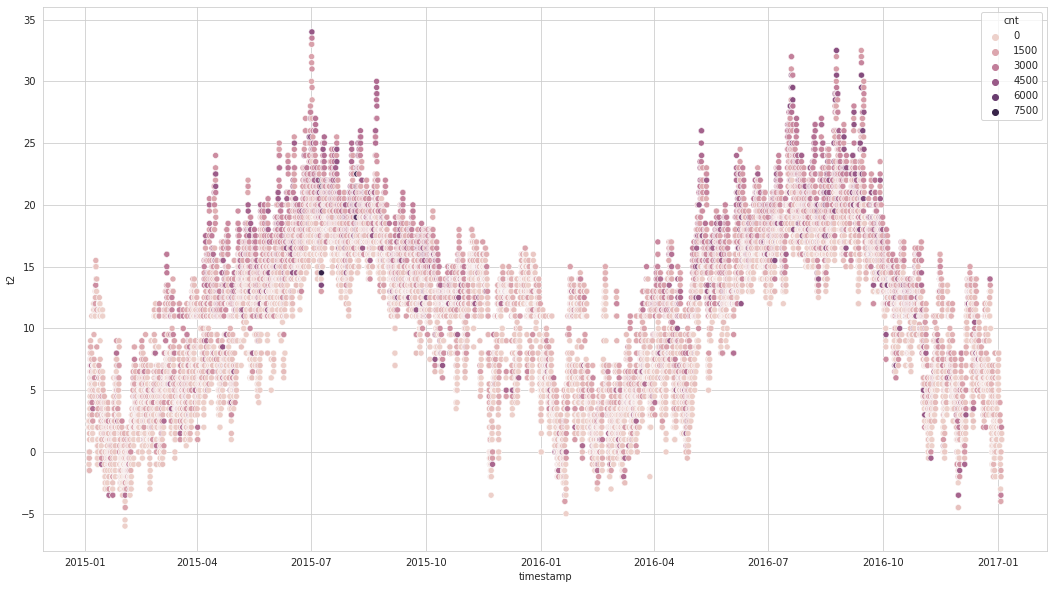

In [ ]:
# tempreature
plt.figure(figsize=(18,10))
sns.scatterplot(x = df.index, y = 't2', data = df, hue = "cnt");

***ii. Plot bike shares by months***

In [ ]:
df_sum = pd.DataFrame(df.groupby('year_month').cnt.sum())

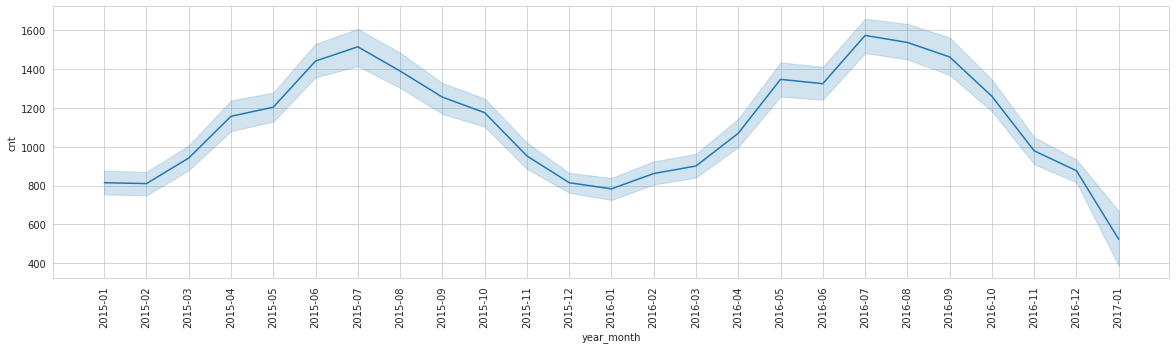

In [ ]:
plt.figure(figsize=(20, 5))

sns.lineplot(x='year_month', y="cnt",data=df)

plt.xticks(rotation=90);

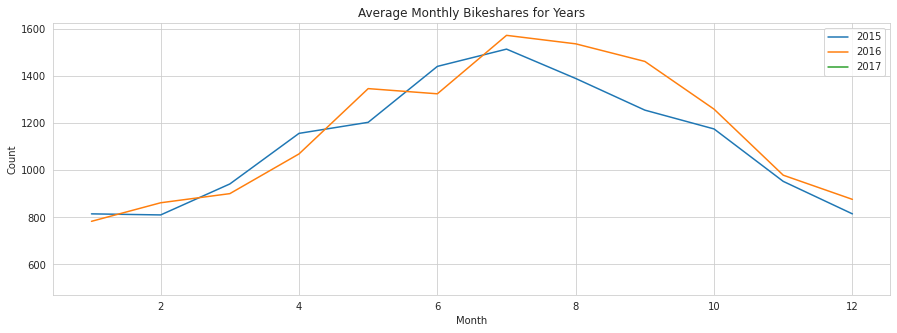

In [ ]:
year_month_cnt = df.groupby(["year", "month"])["cnt"].mean()

plt.figure(figsize=(15,5))
for year in year_month_cnt.index.levels[0]:
    plt.plot(year_month_cnt[year].index, year_month_cnt[year],label=year)

plt.legend()
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Average Monthly Bikeshares for Years')
plt.show()

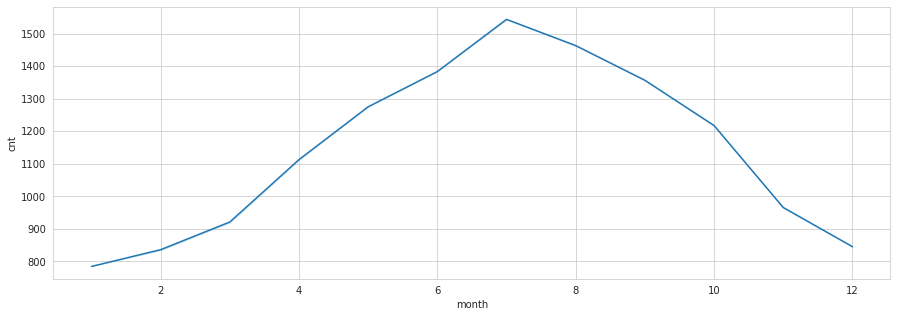

In [ ]:
# with lineplot
plt.figure(figsize=(15, 5))
sns.lineplot(x='month', y='cnt',data=df, ci=False);

In [ ]:
# pip install matplotlib==3.4.2

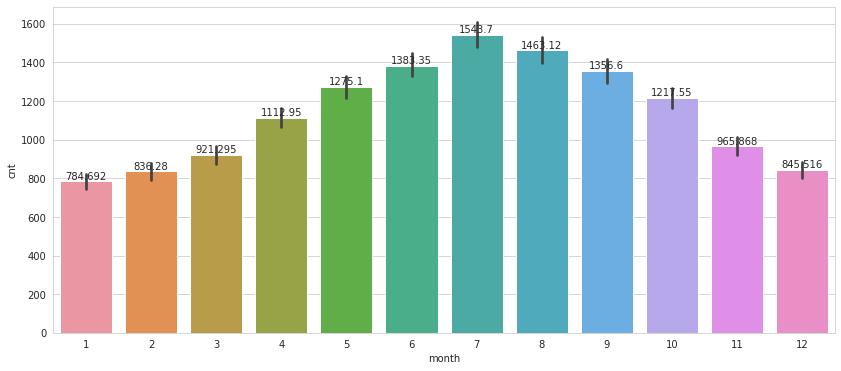

In [ ]:
# with barplot

plt.figure(figsize=(14,6))
ax = sns.barplot(x="month", y="cnt",data=df)
ax.bar_label(ax.containers[0])

plt.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Scatter(
    x = df.index,
    y = df['cnt']
))

fig.update_xaxes(
    rangeslider_visible=True,
    tickformatstops = [
        dict(dtickrange=[None, 10], value="%H:%M:%S.%L ms"),
        dict(dtickrange=[10, 600], value="%H:%M:%S s"),
        dict(dtickrange=[600, 3600], value="%H:%M m"),
        dict(dtickrange=[3600, 86400], value="%H:%M h"),
        dict(dtickrange=[86400, 604800], value="%e. %b d"),
        dict(dtickrange=[604800, "M1"], value="%e. %b w"),
        dict(dtickrange=["M1", "M12"], value="%b '%y M"),
        dict(dtickrange=["M12", None], value="%Y Y")
    ]
)

fig.show()

***iii. Plot bike shares by hours***
- *whether it is a holiday or not*
- *You may want to see seasonal breakdowns*

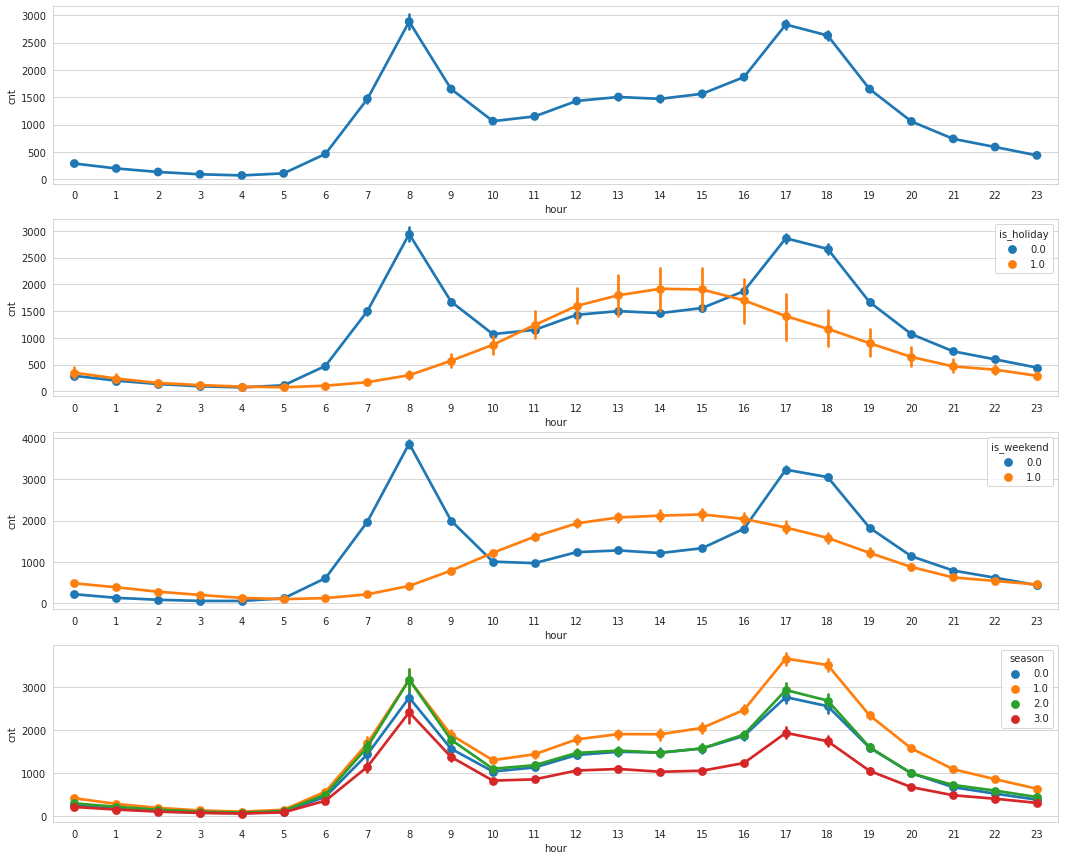

In [ ]:
# with pointplot
fig,(ax1, ax2, ax3, ax4)= plt.subplots(nrows=4, figsize=(18,15)  )

sns.pointplot(data=df, x='hour', y='cnt', ax=ax1)

sns.pointplot(data=df, x='hour', y='cnt', hue='is_holiday', ax=ax2)
sns.pointplot(data=df, x='hour', y='cnt', hue='is_weekend', ax=ax3)
sns.pointplot(data=df, x='hour', y='cnt', hue='season', ax=ax4);

In [ ]:
# hour_cnt = df.groupby("hour")["cnt"].mean()
# plt.figure(figsize=(15,5))
# plt.xticks(np.arange(24))
# sns.lineplot(hour_cnt.index, hour_cnt.values);

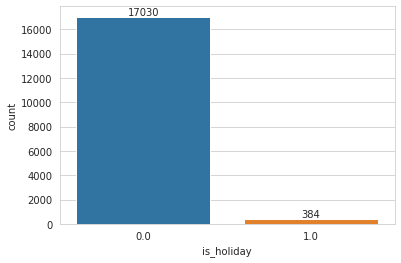

In [ ]:
# is_holiday
ax = sns.countplot(x='is_holiday',data=df)
ax.bar_label(ax.containers[0]);

In [ ]:
season_cnt=df.groupby("season").cnt.sum()
season_cnt

season
0.000    4850236
1.000    6424609
2.000    5073040
3.000    3558087
Name: cnt, dtype: int64

In [ ]:
# season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
import plotly.express as px
fig = px.pie(df, values='cnt', names='season',
             title='Bike Sharing',
             hover_data=['cnt'], labels={'Sharing Count':'cnt'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

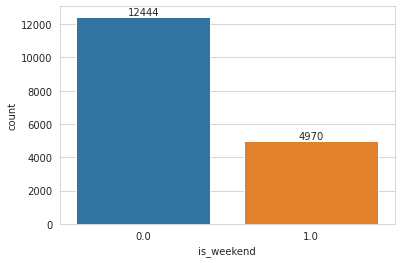

In [ ]:
# is_weekend
ax=sns.countplot(x='is_weekend',data=df)
ax.bar_label(ax.containers[0]);

***iv. Plot bike shares by day of week***
- *You may want to see seasonal breakdowns*

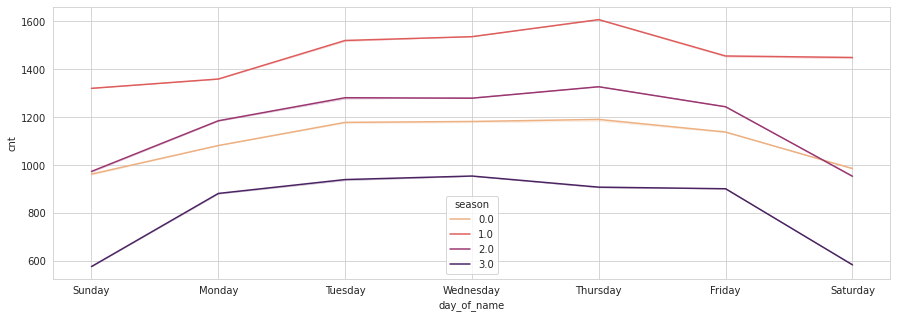

In [ ]:
# with lineplot (*You may want to see seasonal breakdowns*)

plt.figure(figsize=(15, 5))
sns.lineplot(x='day_of_name', y='cnt',data=df, hue='season', ci=False, palette="flare")
plt.show()

***v. Plot the distribution of bike shares on holidays by seasons***

In [ ]:
df.groupby(df.season).cnt.sum()

season
0.000    4850236
1.000    6424609
2.000    5073040
3.000    3558087
Name: cnt, dtype: int64

In [ ]:
df[(df.season == 2)][["is_holiday"]].value_counts() 

is_holiday
0.000         4303
dtype: int64

<AxesSubplot:xlabel='is_holiday', ylabel='cnt'>

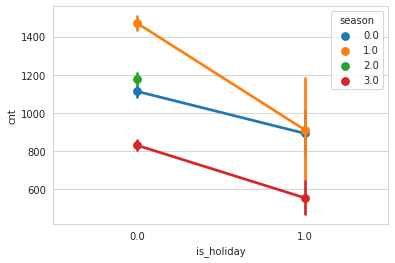

In [ ]:
# season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
sns.pointplot(data=df, x='is_holiday', y='cnt', hue='season')

### Drop unnecessary columns

- Check correlations via heatmap
- Check weather_code
- Think about time-based features and decide dropping which is unnecessary for the model

"weather_code" category description:
- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
- 2 = scattered clouds / few clouds 
- 3 = Broken clouds 
- 4 = Cloudy 
- 7 = Rain/ light Rain shower/ Light rain 
- 10 = rain with thunderstorm 
- 26 = snowfall 

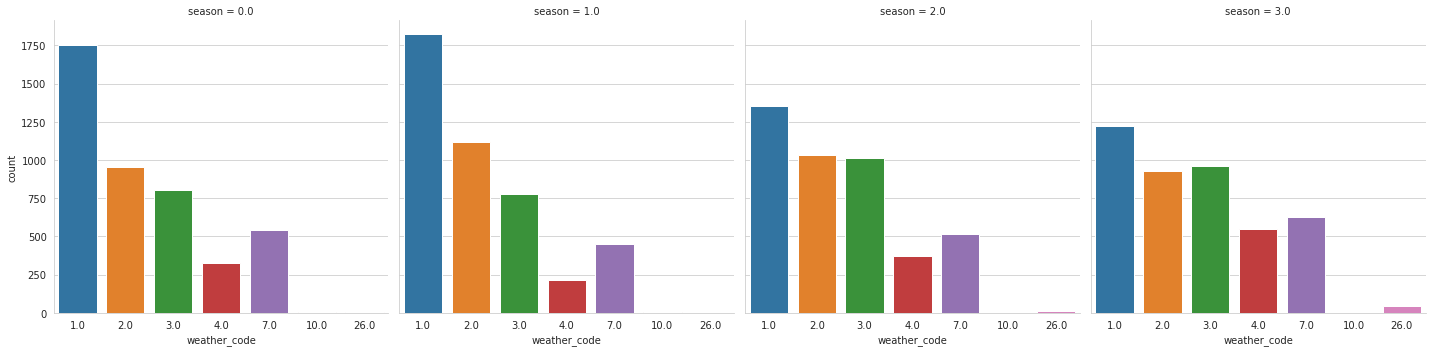

In [ ]:
# with catplot
ax = sns.catplot(x="weather_code", col="season", data=df, kind='count')


weather_code
1.000    1162.089
2.000    1496.177
3.000    1195.124
4.000     635.231
7.000     712.966
10.000    583.429
26.000    250.850
Name: cnt, dtype: float64


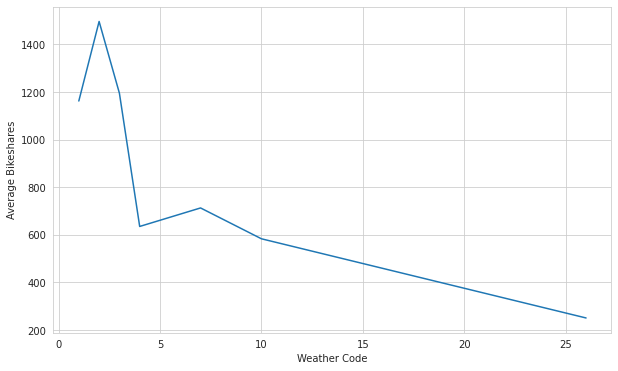

In [ ]:
plt.figure(figsize=(10,6))
ax = df.groupby('weather_code')['cnt'].mean().plot()
ax.set(xlabel='Weather Code')
ax.set(ylabel='Average Bikeshares')
print(df.groupby('weather_code')['cnt'].mean())

<AxesSubplot:>

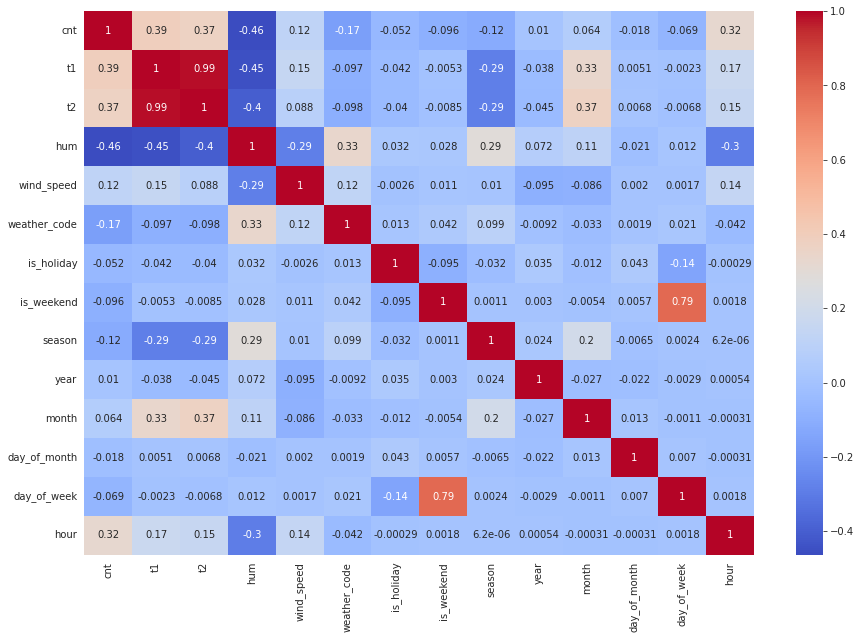

In [ ]:
# for all variables 

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm")

In [ ]:
df.drop(columns=["t1","day_of_month", "day_of_week", "day_of_name", "year_month", "year"],inplace=True)


In [ ]:
df.head()

,cnt,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,hour
timestamp,,,,,,,,,,
2015-01-04 00:00:00,182,2.000,93.000,6.000,3.000,0.000,1.000,3.000,1,0
2015-01-04 01:00:00,138,2.500,93.000,5.000,1.000,0.000,1.000,3.000,1,1
2015-01-04 02:00:00,134,2.500,96.500,0.000,1.000,0.000,1.000,3.000,1,2
2015-01-04 03:00:00,72,2.000,100.000,0.000,1.000,0.000,1.000,3.000,1,3
2015-01-04 04:00:00,47,0.000,93.000,6.500,1.000,0.000,1.000,3.000,1,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t2            17414 non-null  float64
 2   hum           17414 non-null  float64
 3   wind_speed    17414 non-null  float64
 4   weather_code  17414 non-null  float64
 5   is_holiday    17414 non-null  float64
 6   is_weekend    17414 non-null  float64
 7   season        17414 non-null  float64
 8   month         17414 non-null  int64  
 9   hour          17414 non-null  int64  
dtypes: float64(7), int64(3)
memory usage: 2.0 MB


In [ ]:
# df.drop("day_of_name", axis=1, inplace=True)
## cat = train.select_dtypes("object").columns
## enc = OrdinalEncoder() # "day of name" encoder yaptım, ama sonra kullanmaktan vazgeçtim.
## train[cat] = enc.fit_transform(train[cat])

## 2. Data Pre-Processing

### Train - Test Split

Appropriately split the data for optimum training.

In [ ]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size

train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

13931 3483


In [ ]:
# len(df)
# test_days= 90
# test_ind = test_days*24
# train = df.iloc[:-test_ind]
# test = df.iloc[-test_ind:]
# train.shape, test.shape

### Scaling

**Robust Scaling**

It is common to scale data prior to fitting a machine learning model.

This is because data often consists of many different input variables or features (columns) and each may have a different range of values or units of measure, such as feet, miles, kilograms, dollars, etc.

If there are input variables that have very large values relative to the other input variables, these large values can dominate or skew some machine learning algorithms. The result is that the algorithms pay most of their attention to the large values and ignore the variables with smaller values.

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. You can easily normalize the dataset using the Robust Scaling preprocessing class from the scikit-learn library.

- ***Note:*** *You are expected to scale only 't1'/'t2', 'hum', 'wind_speed' variables. You also need to scale the dependent and independent variables separately. You must do this for both train data and test data.*

In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
df.columns

Index(['cnt', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday',
       'is_weekend', 'season', 'month', 'hour'],
      dtype='object')

In [ ]:
f_columns = df.columns[1:] # cnt hariç

f_transformer = RobustScaler() # cnt hariç
target_transformer = RobustScaler() # sadece aplience için

train.loc[:, f_columns] = f_transformer.fit_transform(train[f_columns]) # cnt hariç
train['cnt'] = target_transformer.fit_transform(train[['cnt']]) # cnt için 

test.loc[:, f_columns] = f_transformer.transform(test[f_columns]) # cnt hariç
test['cnt'] = target_transformer.transform(test[['cnt']]) # cnt target olduğu için en sonunda inverse transform yapılacak 
# o nedenle applience için ayrı scale yaptık. birlikte yapılırsa farklı değerlere ulaşılır.

### Define a Function for Creating Time Steps 

In order to use the capabilities of LSTM, we need to organize the data in accordance with the working principles of LSTM.
You must separate the lines ordered by time in decimal steps.
The size of the step may vary depending on the situation, in this case it is set to 10.

Therefore, train and test data should be divided into groups of ten.
When predicting test data, the model is asked to use the information from the next 10 records with itself for each record.

As a result of this operation, each row will create a time step with the next 10 records, and you will have a matrix consisting of steps as many as the row total at the beginning.
So, your data set must be a 3-dimensional numpy array like (15662, 10,13).
As a result, LSTM will learn by taking 10 rows into account for one row.

Create a function, that takes two arguments: the dataset(dependent or independent variables separately), which is a NumPy array that we want to convert into a dataset, and the time_steps, which is the number of previous time steps to use as input variables to predict the next time period.

After defining the function, apply it to train and test sets.

In [ ]:
def create_dataset(X, y, time_steps=1):
    """ Create data sequence
    
    Arguments:
        * X: time-series data
        * y: target value
        * time_steps: Used to create input sequence of timesteps
    
    Returns:
        * input_sequence: Numpy array of sequences of time-series data
        * output: Numpy array of output i.e. next value for respective sequence
    
    """
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
time_steps = 168 #lenght

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.cnt, time_steps)
X_test, y_test = create_dataset(test, test.cnt, time_steps)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(13763, 168, 10) (13763,)
(3315, 168, 10) (3315,)


---
---

## 3. Model Building with LSTM



##Recurrent Neural Networks 
RNN are a type of artifcial neural network designed to recognize patterns in sequences of data, such as text, genomes, handwriting, the spoken word, numerical times series data.

Recurrent Neural Networks use backpropagation algorithm for training. Because of their internal memory, RNN’s are able to remember important things about the input they received, which enables them to be very precise in predicting what’s coming next.

RNNs could be stacked up to deeper versions, which contain more than 1 layers of RNN. Because RNNs are especially computationally expensive to train, normally a deep RNN model contains no more than 3 layers of LSTM.

Train a bidirectional long short term memory (LSTM) recurrent neural network (RNN) with this data, making use of the self-loop and forget gate of LSTM.

LSTM sequential learning model was chosen because of its ability to process sequential data and memorize data of past time steps.

LSTM is a different type of gated RNN which is capable of learning long-term dependencies LSTM is not affected by vanishing gradient or exploding gradient problem
Using Bidirectional LSTMs, we feed the learning algorithm with the original data once from beginning to the end and once from end to beginning.

#### Bidirectional LSTM :
Bidirectional LSTMs are an extension of traditional LSTMs that can improve model performance on sequence classification problems.

In problems where all timesteps of the input sequence are available, Bidirectional LSTMs train two instead of one LSTMs on the input sequence. The first on the input sequence as-is and the second on a reversed copy of the input sequence. This can provide additional context to the network and result in faster and even fuller learning on the problem. Figure shows the mechanism of Bidirectional LSTM.






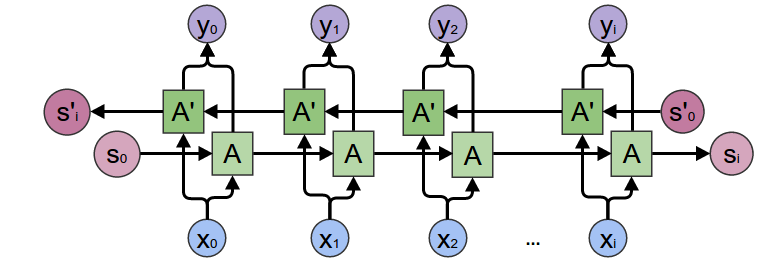

### Create, Compile and Fit Bidirectional LSTM Model

- Create a Sequential Model,
- Add Bidirectional layers,
- Apply Regularization (Drop Out),
- Compile the model.

***Note:*** *Define the optimizer as the efficient stochastic gradient descent algorithm ***adam***.* *This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems.*

*In this case, use ***mean squared error*** as the loss argument. This loss is for a regression problems and is defined in Keras as mean_squared_error.
Also use defined in Keras as ***accuracy*** as the metrics.*

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
n_features = X_train.shape[2]
n_features

10

In [ ]:
from tensorflow import keras
from keras import optimizers
optimizer=keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(units=100, input_shape=(time_steps, n_features)))) # return_sequences=True tek katman olduğu için kullanılmalıdı.
#model.add(Dropout(rate=0.2))
model.add(Dense(units=1))

model.compile(optimizer=optimizer, loss='mse')

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True) # restore_best_weights = True en iyi veriyi alıyor. early stopta kullanmayı unutma..

In [ ]:
model.fit(X_train, y_train, 
          epochs=20, 
          batch_size=24, 
          validation_split=0.2,
#          shuffle=False,
          callbacks=[early_stop])

Epoch 1/20
459/459 [==============================] - 48s 87ms/step - loss: 0.0666 - val_loss: 0.0318
Epoch 2/20
459/459 [==============================] - 39s 84ms/step - loss: 0.0260 - val_loss: 0.0373
Epoch 3/20
459/459 [==============================] - 38s 84ms/step - loss: 0.0207 - val_loss: 0.0267
Epoch 4/20
459/459 [==============================] - 38s 83ms/step - loss: 0.0188 - val_loss: 0.0231
Epoch 5/20
459/459 [==============================] - 38s 82ms/step - loss: 0.0161 - val_loss: 0.0305
Epoch 6/20
459/459 [==============================] - 38s 83ms/step - loss: 0.0140 - val_loss: 0.0199
Epoch 7/20
459/459 [==============================] - 38s 83ms/step - loss: 0.0135 - val_loss: 0.0199
Epoch 8/20
459/459 [==============================] - 38s 83ms/step - loss: 0.0135 - val_loss: 0.0285
Epoch 9/20
459/459 [==============================] - 38s 82ms/step - loss: 0.0147 - val_loss: 0.0247
Epoch 10/20
459/459 [==============================] - 38s 82ms/step - loss: 0.012

<AxesSubplot:>

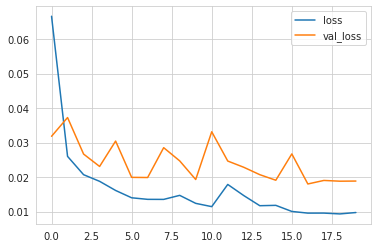

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

---
---

## 4. Evaluate on Test Data

At this stage, you will measure the prediction success of your model. So, you will need to compare the actual values of the test data with their predicted values. 

For this reason, you must inverse transform the y_pred variable predicted by the model with the target variables of the train and test data you have previously scaled.

Check scores with both scaled results and inversed results

Plot predictions and actula values together

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

### First way : after each prediction, reel value will be use for next prediction¶

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
eval_metrics(y_test, y_pred)

r2_score: 0.9778527265025045 
mae: 0.07592141838713326 
mse: 0.013669847678541052 
rmse: 0.11691812382407209


### Inverse Transformation and Compare

In [ ]:
y_train_inv = target_transformer.inverse_transform(y_train.reshape(1, -1)) # ne taraf -1 ise diğer tarafa uyum sağlıyor.
y_test_inv = target_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = target_transformer.inverse_transform(y_pred)

In [ ]:
test_index = test.iloc[time_steps:].index

pred_test = pd.concat([pd.DataFrame(y_test_inv.reshape(-1, 1)),
                       pd.DataFrame(y_pred_inv)], axis = 1)
pred_test.columns=['test','prediction']
pred_test.index = test_index
pred_test

,test,prediction
timestamp,,
2016-08-17 06:00:00,761.000,788.703
2016-08-17 07:00:00,2471.000,2249.524
2016-08-17 08:00:00,4667.000,4615.781
2016-08-17 09:00:00,2429.000,2405.403
2016-08-17 10:00:00,1373.000,1463.663
...,...,...
2017-01-03 19:00:00,1042.000,1285.031
2017-01-03 20:00:00,541.000,592.176
2017-01-03 21:00:00,337.000,356.003


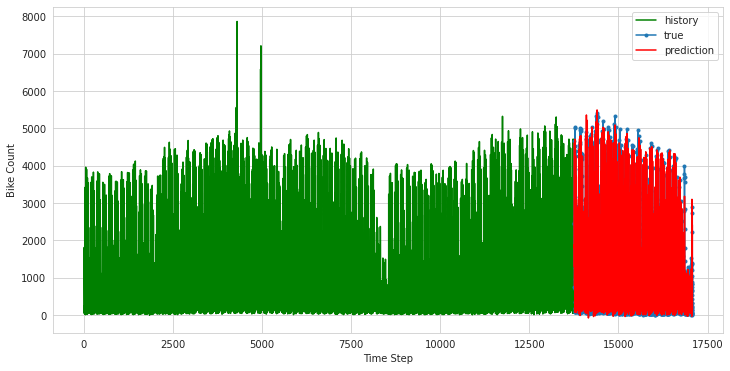

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

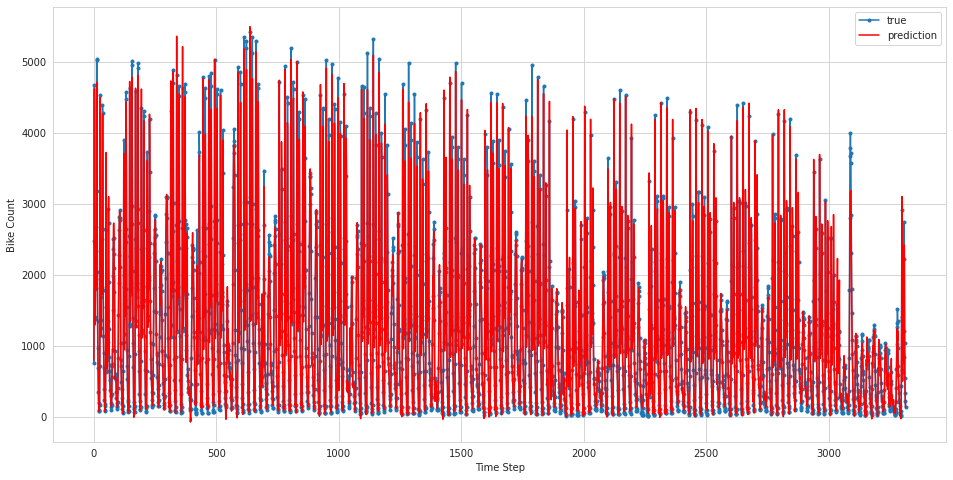

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

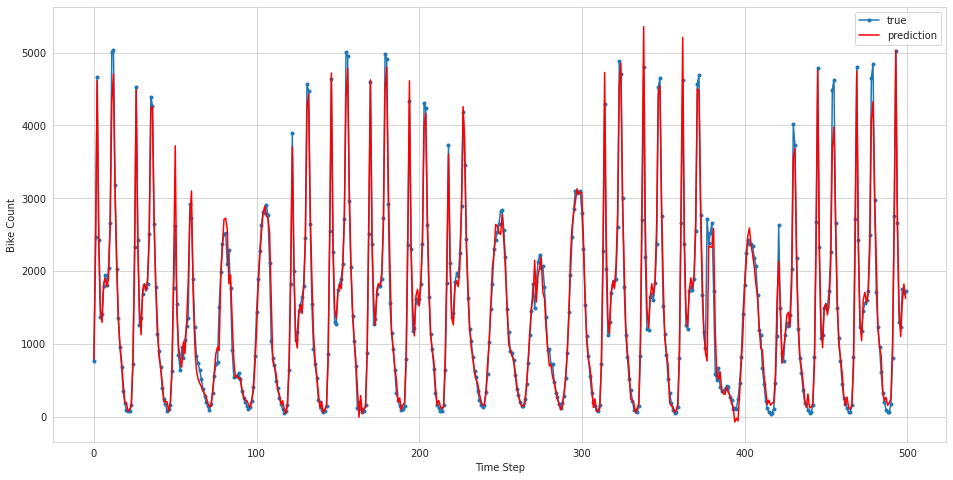

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inv.flatten()[0:500], marker='.', label="true")
plt.plot(y_pred_inv.flatten()[0:500], 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

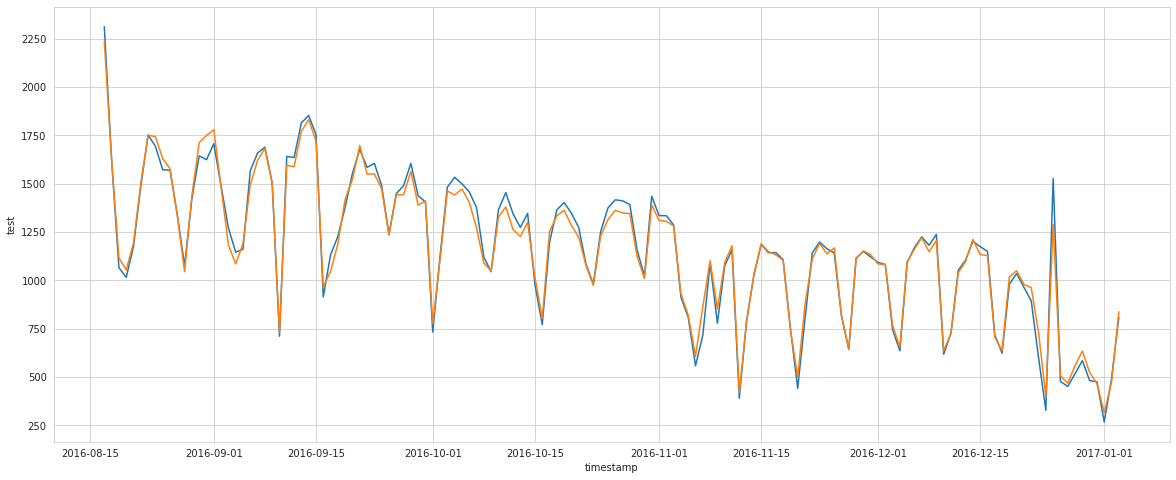

In [ ]:
plt.figure(figsize=(20,8))
data_by_day = pred_test.resample('24H').mean() # 
sns.lineplot(x=data_by_day.index, y='test', data=data_by_day)
sns.lineplot(x=data_by_day.index, y='prediction', data=data_by_day)
plt.show()

### Second way : after each prediction, result will be use for next prediction

In [ ]:
time_steps=168

In [ ]:
train

,cnt,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,hour
timestamp,,,,,,,,,,
2015-01-04 00:00:00,-0.462,-1.050,0.975,-0.909,0.500,0.000,1.000,0.667,-0.800,-1.000
2015-01-04 01:00:00,-0.493,-1.000,0.975,-1.000,-0.500,0.000,1.000,0.667,-0.800,-0.917
2015-01-04 02:00:00,-0.496,-1.000,1.150,-1.455,-0.500,0.000,1.000,0.667,-0.800,-0.833
2015-01-04 03:00:00,-0.540,-1.050,1.325,-1.455,-0.500,0.000,1.000,0.667,-0.800,-0.750
2015-01-04 04:00:00,-0.558,-1.250,0.975,-0.864,-0.500,0.000,1.000,0.667,-0.800,-0.667
...,...,...,...,...,...,...,...,...,...,...
2016-08-09 22:00:00,0.019,0.350,-0.925,0.273,-0.500,0.000,0.000,0.000,0.600,0.833
2016-08-09 23:00:00,-0.238,0.250,-0.725,0.000,-0.500,0.000,0.000,0.000,0.600,0.917
2016-08-10 00:00:00,-0.377,0.200,-0.525,0.091,-0.500,0.000,0.000,0.000,0.600,-1.000


In [ ]:
df_fake = test.iloc[:time_steps,1:]
df_fake

,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,hour
timestamp,,,,,,,,,
2016-08-10 03:00:00,0.050,0.175,0.000,-0.500,0.000,0.000,0.000,0.600,-0.750
2016-08-10 04:00:00,0.050,0.175,-0.182,-0.500,0.000,0.000,0.000,0.600,-0.667
2016-08-10 05:00:00,0.000,0.300,-0.273,-0.500,0.000,0.000,0.000,0.600,-0.583
2016-08-10 06:00:00,0.050,0.300,-0.091,-0.500,0.000,0.000,0.000,0.600,-0.500
2016-08-10 07:00:00,0.100,0.050,0.000,0.000,0.000,0.000,0.000,0.600,-0.417
...,...,...,...,...,...,...,...,...,...
2016-08-17 01:00:00,0.250,0.425,-0.773,0.000,0.000,0.000,0.000,0.600,-0.917
2016-08-17 02:00:00,0.250,0.425,-0.864,-0.500,0.000,0.000,0.000,0.600,-0.833
2016-08-17 03:00:00,0.150,0.725,-0.909,0.000,0.000,0.000,0.000,0.600,-0.750


In [ ]:
reel = np.array(test.iloc[:time_steps,:1])
reel.reshape((1,-1))[0]

array([-0.56686768, -0.55480667, -0.48882582,  0.00425683,  1.08478184,
        2.56119191,  0.99113161,  0.27740333,  0.27811281,  0.48031217,
        0.53281305,  0.54558354,  0.65980844,  1.17701313,  2.60517914,
        2.51578574,  1.5352962 ,  0.74068819,  0.24476765,  0.06314296,
       -0.18091522, -0.38240511, -0.46328485, -0.5094005 , -0.52571834,
       -0.53777935, -0.51081944, -0.06739979,  1.02376729,  2.48385952,
        0.97694218,  0.25611919,  0.30932955,  0.55125931,  0.61794963,
        0.68534941,  0.73004612,  1.03653778,  2.39659454,  2.33203264,
        1.29975168,  0.63994324,  0.23625399,  0.0794608 , -0.14757006,
       -0.30578219, -0.45193331, -0.51578574, -0.52500887, -0.53281305,
       -0.49521107, -0.11635332,  0.89322455,  2.25895708,  1.05995034,
        0.40652714,  0.53848883,  0.79957432,  0.92727918,  0.79957432,
        0.99751685,  1.515431  ,  2.5143668 ,  2.148989  ,  1.267116  ,
        0.75842497,  0.26888968,  0.12131962, -0.0248315 , -0.11

In [ ]:
df_fake.shape

(168, 9)

In [ ]:
df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1])).shape

(168, 1, 9)

In [ ]:
train.values[-time_steps:].shape

(168, 10)

In [ ]:
predictions_scaled = []

first_eval_batch = train.values[-time_steps:]
current_batch = first_eval_batch.reshape((1, time_steps, n_features))
features = df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1]))

for i in range(time_steps):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0])
    new = features[i][0].tolist()
    new.insert(0,current_pred[0][0])
    new = np.array(new).reshape(1,1,n_features)
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], new, axis=1)

In [ ]:
predictions_scaled

[array([-0.5550018], dtype=float32),
 array([-0.55727684], dtype=float32),
 array([-0.51657623], dtype=float32),
 array([-0.09147154], dtype=float32),
 array([1.0579433], dtype=float32),
 array([2.662556], dtype=float32),
 array([1.0753009], dtype=float32),
 array([0.32531053], dtype=float32),
 array([0.20581117], dtype=float32),
 array([0.4881109], dtype=float32),
 array([0.5367297], dtype=float32),
 array([0.4423645], dtype=float32),
 array([0.47095728], dtype=float32),
 array([0.83546084], dtype=float32),
 array([1.9746314], dtype=float32),
 array([2.0552866], dtype=float32),
 array([1.1365751], dtype=float32),
 array([0.5890495], dtype=float32),
 array([0.24475951], dtype=float32),
 array([0.05629167], dtype=float32),
 array([-0.14580315], dtype=float32),
 array([-0.3689317], dtype=float32),
 array([-0.4911855], dtype=float32),
 array([-0.486919], dtype=float32),
 array([-0.48761523], dtype=float32),
 array([-0.4126286], dtype=float32),
 array([-0.29577363], dtype=float32),
 array(

In [ ]:
reel

array([[-0.56686768],
       [-0.55480667],
       [-0.48882582],
       [ 0.00425683],
       [ 1.08478184],
       [ 2.56119191],
       [ 0.99113161],
       [ 0.27740333],
       [ 0.27811281],
       [ 0.48031217],
       [ 0.53281305],
       [ 0.54558354],
       [ 0.65980844],
       [ 1.17701313],
       [ 2.60517914],
       [ 2.51578574],
       [ 1.5352962 ],
       [ 0.74068819],
       [ 0.24476765],
       [ 0.06314296],
       [-0.18091522],
       [-0.38240511],
       [-0.46328485],
       [-0.5094005 ],
       [-0.52571834],
       [-0.53777935],
       [-0.51081944],
       [-0.06739979],
       [ 1.02376729],
       [ 2.48385952],
       [ 0.97694218],
       [ 0.25611919],
       [ 0.30932955],
       [ 0.55125931],
       [ 0.61794963],
       [ 0.68534941],
       [ 0.73004612],
       [ 1.03653778],
       [ 2.39659454],
       [ 2.33203264],
       [ 1.29975168],
       [ 0.63994324],
       [ 0.23625399],
       [ 0.0794608 ],
       [-0.14757006],
       [-0

In [ ]:
eval_metrics(reel, predictions_scaled)

r2_score: 0.8685591524666153 
mae: 0.23571817871297465 
mse: 0.12899839820803266 
rmse: 0.3591634700356269


### Inverse Transformation and Compare

In [ ]:
predictions = target_transformer.inverse_transform(predictions_scaled)
reel = target_transformer.inverse_transform(reel)

In [ ]:
compare = pd.DataFrame(data = reel, index = test.index[:time_steps], columns = ["reel"])
compare["prediction"] = predictions
compare

,reel,prediction
timestamp,,
2016-08-10 03:00:00,34.000,50.725
2016-08-10 04:00:00,51.000,47.518
2016-08-10 05:00:00,144.000,104.886
2016-08-10 06:00:00,839.000,704.071
2016-08-10 07:00:00,2362.000,2324.171
...,...,...
2016-08-17 01:00:00,169.000,731.286
2016-08-17 02:00:00,89.000,560.473
2016-08-17 03:00:00,67.000,481.571


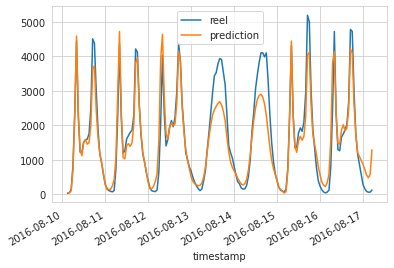

In [ ]:
compare.plot();

## 5. Retrain and Forecasting

### Scale full data

In [ ]:
df_scaled = df.copy()

In [ ]:
f_columns = df_scaled.columns[1:]

f_transformer = RobustScaler()
target_transformer = RobustScaler()

df_scaled.loc[:, f_columns] = f_transformer.fit_transform(df_scaled[f_columns])
df_scaled['cnt'] = target_transformer.fit_transform(df_scaled[['cnt']])

In [ ]:
df_scaled

,cnt,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,hour
timestamp,,,,,,,,,,
2015-01-04 00:00:00,-0.468,-1.050,0.925,-0.857,0.500,0.000,1.000,1.000,-1.000,-1.000
2015-01-04 01:00:00,-0.499,-1.000,0.925,-0.952,-0.500,0.000,1.000,1.000,-1.000,-0.917
2015-01-04 02:00:00,-0.502,-1.000,1.100,-1.429,-0.500,0.000,1.000,1.000,-1.000,-0.833
2015-01-04 03:00:00,-0.546,-1.050,1.275,-1.429,-0.500,0.000,1.000,1.000,-1.000,-0.750
2015-01-04 04:00:00,-0.563,-1.250,0.925,-0.810,-0.500,0.000,1.000,1.000,-1.000,-0.667
...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,0.140,-1.150,0.325,0.381,0.500,0.000,0.000,1.000,-1.000,0.583
2017-01-03 20:00:00,-0.214,-1.150,0.325,0.571,1.000,0.000,0.000,1.000,-1.000,0.667
2017-01-03 21:00:00,-0.358,-1.100,0.200,0.857,1.000,0.000,0.000,1.000,-1.000,0.750


In [ ]:
val_size = 24
val = df_scaled.iloc[-val_size:]
full = df_scaled.iloc[:-val_size]
print(len(full), len(val))

17390 24


### reshape to [samples, time_steps, n_features]

In [ ]:
X, y = create_dataset(full, full.cnt, time_steps)

print(X.shape, y.shape)

(17222, 168, 10) (17222,)


### Create Final model with full data 

In [ ]:
model = Sequential()

model.add(Bidirectional(LSTM(units=100, input_shape=(time_steps, n_features))))

#model.add(Dropout(rate=0.2))

model.add(Dense(units=1))

model.compile(optimizer=optimizer, loss='mse')

In [ ]:
model.fit(X, y, 
          epochs=15, 
          batch_size=24, 
         # shuffle=False
         )

Epoch 1/15
718/718 [==============================] - 60s 77ms/step - loss: 0.2448
Epoch 2/15
718/718 [==============================] - 55s 77ms/step - loss: 0.0973
Epoch 3/15
718/718 [==============================] - 55s 77ms/step - loss: 0.0880
Epoch 4/15
718/718 [==============================] - 55s 77ms/step - loss: 0.0864
Epoch 5/15
718/718 [==============================] - 55s 77ms/step - loss: 0.0828
Epoch 6/15
718/718 [==============================] - 55s 77ms/step - loss: 0.0849
Epoch 7/15
718/718 [==============================] - 55s 77ms/step - loss: 0.0771
Epoch 8/15
718/718 [==============================] - 55s 77ms/step - loss: 0.0798
Epoch 9/15
718/718 [==============================] - 55s 77ms/step - loss: 0.0782
Epoch 10/15
718/718 [==============================] - 55s 76ms/step - loss: 0.0768
Epoch 11/15
718/718 [==============================] - 55s 76ms/step - loss: 0.0750
Epoch 12/15
718/718 [==============================] - 55s 77ms/step - loss: 0.0701
E

<AxesSubplot:>

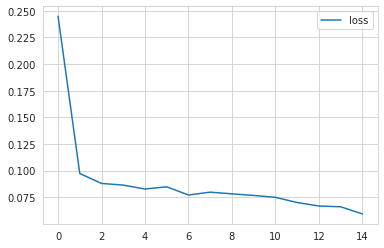

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

### forecasting

In [ ]:
df_fake = val.iloc[:,1:]
df_fake

,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,hour
timestamp,,,,,,,,,
2017-01-03 00:00:00,-1.450,0.775,-0.381,-0.500,0.000,0.000,1.000,-1.000,-1.000
2017-01-03 01:00:00,-1.450,0.625,-0.476,-0.500,0.000,0.000,1.000,-1.000,-0.917
2017-01-03 02:00:00,-1.550,0.775,-0.381,-0.500,0.000,0.000,1.000,-1.000,-0.833
2017-01-03 03:00:00,-1.650,0.925,-0.190,-0.500,0.000,0.000,1.000,-1.000,-0.750
2017-01-03 04:00:00,-1.650,0.925,-0.095,-0.500,0.000,0.000,1.000,-1.000,-0.667
2017-01-03 05:00:00,-1.600,0.775,-0.095,0.500,0.000,0.000,1.000,-1.000,-0.583
2017-01-03 06:00:00,-1.600,0.625,0.286,-0.500,0.000,0.000,1.000,-1.000,-0.500
2017-01-03 07:00:00,-1.650,0.625,0.381,-0.500,0.000,0.000,1.000,-1.000,-0.417
2017-01-03 08:00:00,-1.600,0.625,0.333,0.500,0.000,0.000,1.000,-1.000,-0.333


In [ ]:
reel = np.array(val.iloc[:,:1])
reel.reshape((1,-1))[0]

array([-5.52040997e-01, -5.61936738e-01, -5.66177770e-01, -5.89503446e-01,
       -5.75366673e-01, -5.37904223e-01, -2.89803852e-01,  3.97950168e-01,
        1.45608765e+00,  3.62608235e-01, -1.29351476e-01, -1.47022442e-01,
       -1.34299346e-02,  2.40325146e-02, -5.58402545e-02,  7.06838664e-04,
        2.52341403e-01,  1.34157978e+00,  9.72610002e-01,  1.39954055e-01,
       -2.14172115e-01, -3.58367203e-01, -4.38239972e-01, -4.98321258e-01])

### First way : after each prediction, reel value will be use for next prediction

In [ ]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 24

first_eval_batch = full.values[-time_steps:]
current_batch = first_eval_batch.reshape((1, time_steps, full.shape[1]))
features = df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1]))

for i in range(periods):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)[0][0]
    
    # store prediction
    forecast.append(current_pred) 
    new = features[i][0].tolist()
    new.insert(0,reel[i][0])
    new = np.array(new).reshape(1,1,full.shape[1])
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], new, axis = 1)

In [ ]:
eval_metrics(reel.reshape((1,-1))[0], forecast)

r2_score: 0.687255266908247 
mae: 0.23954079918095536 
mse: 0.10261909554336272 
rmse: 0.3203421538657732


In [ ]:
forecast = target_transformer.inverse_transform(np.array(forecast).reshape(1,-1))
forecast

array([[ 117.37604,  185.0636 ,  170.92255,  257.50153,  292.60345,
         371.27222,  506.41254, 1018.5915 , 1903.2007 , 1851.4617 ,
        1296.3575 ,  889.1966 , 1003.3279 , 1242.0188 , 1196.5854 ,
        1022.8472 , 1149.9294 , 1376.0117 , 1970.9304 , 1309.4363 ,
        1040.8685 ,  706.0234 ,  417.33395,  163.42279]], dtype=float32)

In [ ]:
df.tail(5)

,cnt,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,hour
timestamp,,,,,,,,,,
2017-01-03 19:00:00,1042,-1.150,0.375,0.273,0.500,0.000,0.000,0.667,1,19
2017-01-03 20:00:00,541,-1.150,0.375,0.455,1.000,0.000,0.000,0.667,1,20
2017-01-03 21:00:00,337,-1.100,0.250,0.727,1.000,0.000,0.000,0.667,1,21
2017-01-03 22:00:00,224,-1.100,0.125,0.636,1.000,0.000,0.000,0.667,1,22
2017-01-03 23:00:00,139,-1.150,0.125,0.545,0.000,0.000,0.000,0.667,1,23


In [ ]:
forecast_index = pd.date_range(start = '2017-01-04 00:00:00', periods = periods, freq = 'H')

In [ ]:
forecast_df = pd.DataFrame(data = forecast.reshape(-1, 1), index = forecast_index, columns = ['Forecast'])

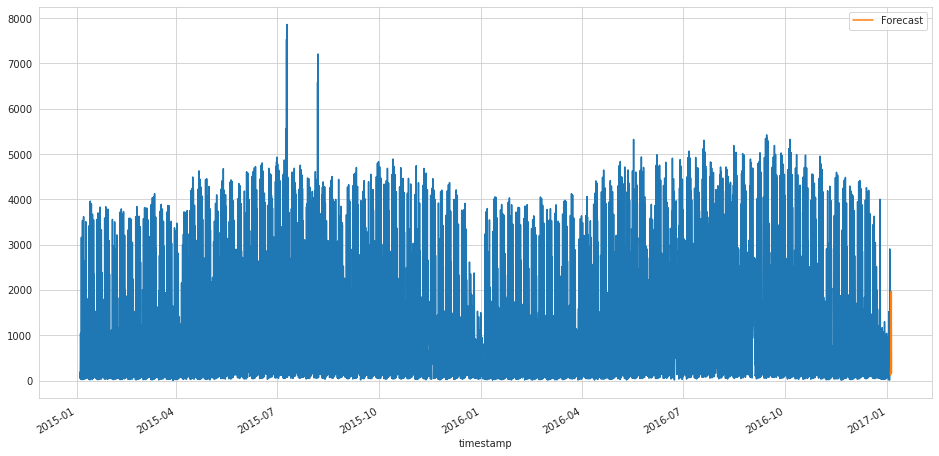

In [ ]:
ax = df["cnt"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(17169.0, 17170.958333333332)

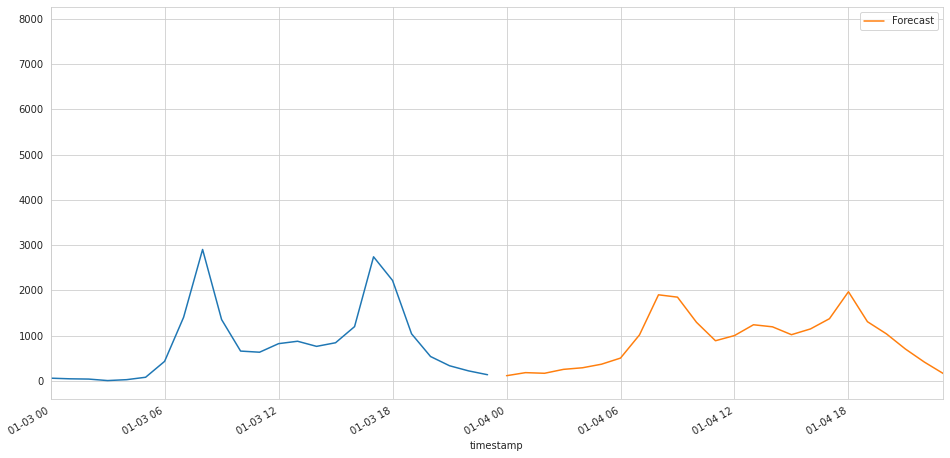

In [ ]:
ax = df["cnt"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2017-01-03 00:00:00', '2017-01-04 23:00:00')# started with date of validation data

### Second way : after each prediction, result will be use for next prediction

In [ ]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 24

first_eval_batch = full.values[-time_steps:]
current_batch = first_eval_batch.reshape((1, time_steps, full.shape[1]))
features = df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1]))

for i in range(periods):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)[0][0]
    
    # store prediction
    forecast.append(current_pred) 
    new = features[i][0].tolist()
    new.insert(0,current_pred)
    new = np.array(new).reshape(1,1,full.shape[1])
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], new, axis = 1)

In [ ]:
eval_metrics(reel.reshape((1,-1))[0], forecast)

r2_score: 0.014508263066089766 
mae: 0.4617831201374367 
mse: 0.3233636253754139 
rmse: 0.5686507059482243


In [ ]:
forecast = target_transformer.inverse_transform(np.array(forecast).reshape(1,-1))
forecast

array([[ 117.37604,  266.6571 ,  484.22882,  896.1005 , 1427.1702 ,
        1468.7583 , 1426.1533 , 1420.1511 , 1434.6227 , 1406.1465 ,
        1342.0455 , 1312.7034 , 1293.7173 , 1270.6506 , 1246.4369 ,
        1196.46   , 1175.6879 , 1215.321  , 1196.0481 , 1105.214  ,
        1093.2654 , 1189.3619 , 1138.0724 ,  902.3941 ]], dtype=float32)

In [ ]:
forecast_index = pd.date_range(start = '2017-01-04 00:00:00', periods = periods, freq = 'H')

In [ ]:
forecast_df = pd.DataFrame(data = forecast.reshape(-1, 1), index = forecast_index, columns = ['Forecast'])

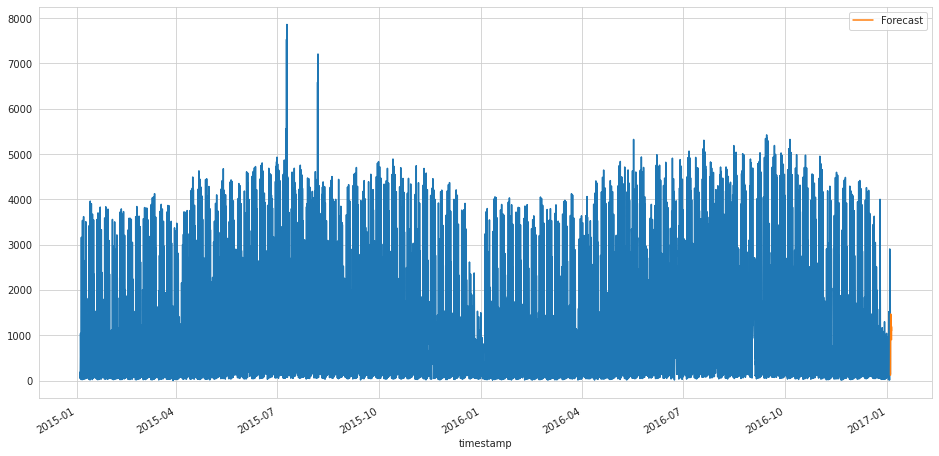

In [ ]:
ax = df["cnt"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(17168.0, 17170.0)

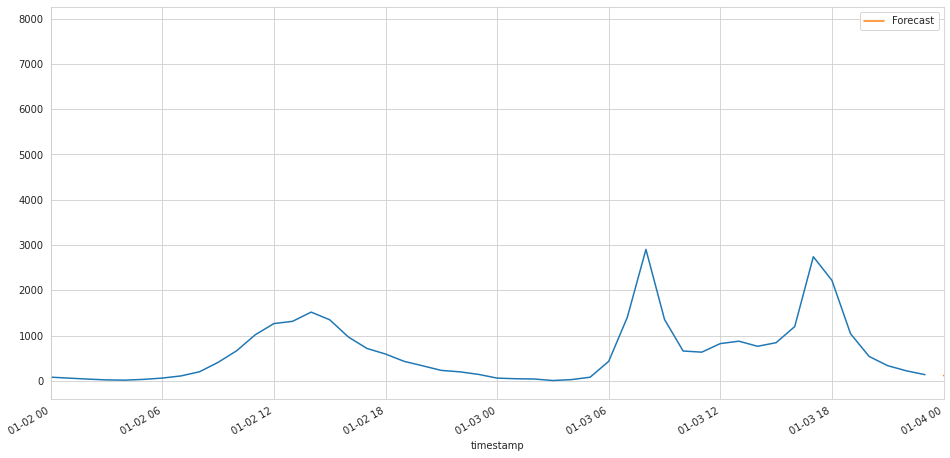

In [ ]:
ax = df["cnt"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2017-01-02 01:00:00', '2017-01-04 18:00:00')

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___